In [1]:
!pip install numpy
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Regressors
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Classifiers
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

#Model evaluation tools
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

#Data processing functions

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

In [2]:
taxi_data = pd.read_csv('C:/Users/Jayant/Downloads/TaxiFare.csv')

In [3]:
taxi_data.shape

(50000, 8)

In [4]:
taxi_data.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [5]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [6]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [7]:
taxi_data.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [8]:
correlation_mat = taxi_data.corr()

<AxesSubplot:>

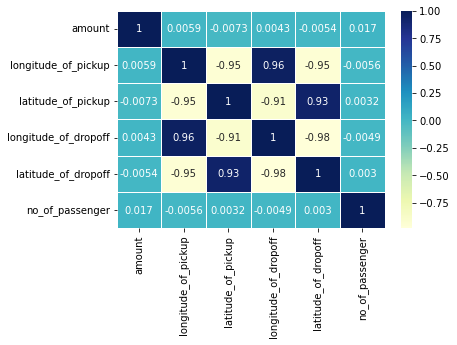

In [9]:
sns.heatmap(correlation_mat,annot=True,linewidths=.5,cmap="YlGnBu")

In [10]:
taxi_data[['unique_id_numeric', 'unique_id_string']] = taxi_data['unique_id'].str.split(':', expand=True)
taxi_data['unique_id_numeric'] = taxi_data['unique_id_numeric'].astype(float)

In [11]:
le = LabelEncoder()
taxi_data['unique_id'] = le.fit_transform(taxi_data['unique_id'])
taxi_data['date_time_of_pickup'] = le.fit_transform(taxi_data['date_time_of_pickup'])
taxi_data['unique_id_string'] = le.fit_transform(taxi_data['unique_id_string'])

In [12]:
X = taxi_data.drop('amount', axis=1)
y = taxi_data['amount']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.head(5)

,unique_id,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,unique_id_numeric,unique_id_string
39087,240,35429,-73.974332,40.791427,-73.979032,40.766365,5,4.0,0
30893,1558,31069,-73.973657,40.751632,-73.969945,40.756702,5,26.0,0
45278,2697,24747,-73.975263,40.752280,-73.995098,40.737500,4,45.0,0
16398,77,26547,-73.983034,40.766784,-73.971944,40.789289,1,1.0,17
13653,1846,49426,-73.986717,40.771648,-73.982140,40.770699,1,30.0,49


In [15]:
y_train.head(5)

39087    10.0
30893     4.0
45278     6.9
16398     7.7
13653     4.5
Name: amount, dtype: float64

In [16]:
string_cols = X.dtypes[X.dtypes == 'object'].index
print(f"Columns with string values: {string_cols}")

Columns with string values: Index([], dtype='object')


In [17]:
#Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression MSE: {mse:.2f}, R-squared: {r2:.2f}")

Linear Regression MSE: 91.10, R-squared: 0.02


In [29]:
# Support Vector Regression
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
svr_mse = mean_squared_error(y_test, y_pred)
svr_r2 = r2_score(y_test, y_pred)
print(f"Support Vector Regression MSE: {svr_mse:.2f}, R-squared: {svr_r2:.2f}")

Support Vector Regression MSE: 99.28, R-squared: -0.07


In [21]:
# Decision Tree Regression
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
y_pred = dt_reg.predict(X_test)
dt_reg_mse = mean_squared_error(y_test, y_pred)
dt_reg_r2 = r2_score(y_test, y_pred)
print(f"Decision Tree Regression MSE: {dt_reg_mse:.2f}, R-squared: {dt_reg_r2:.2f}")

Decision Tree Regression MSE: 44.01, R-squared: 0.53


In [22]:
# Bagging Regression
bag_reg = BaggingRegressor()
bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)
bag_reg_mse = mean_squared_error(y_test, y_pred)
bag_reg_r2 = r2_score(y_test, y_pred)
print(f"Bagging Regression MSE: {bag_reg_mse:.2f}, R-squared: {bag_reg_r2:.2f}")

Bagging Regression MSE: 25.45, R-squared: 0.73


In [23]:
# AdaBoost Regression
ada_reg = AdaBoostRegressor()
ada_reg.fit(X_train, y_train)
y_pred = ada_reg.predict(X_test)
ada_reg_mse = mean_squared_error(y_test, y_pred)
ada_reg_r2 = r2_score(y_test, y_pred)
print(f"AdaBoost Regression MSE: {ada_reg_mse:.2f}, R-squared: {ada_reg_r2:.2f}")

AdaBoost Regression MSE: 178.42, R-squared: -0.92


In [24]:
# Gradient Boosting Regression
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)
y_pred = gb_reg.predict(X_test)
gb_reg_mse = mean_squared_error(y_test, y_pred)
gb_reg_r2 = r2_score(y_test, y_pred)
print(f"Gradient Boosting Regression MSE: {gb_reg_mse:.2f}, R-squared: {gb_reg_r2:.2f}")

Gradient Boosting Regression MSE: 27.91, R-squared: 0.70


In [25]:
# Random Forest Regression
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)
rf_reg_mse = mean_squared_error(y_test, y_pred)
rf_reg_r2 = r2_score(y_test, y_pred)
print(f"Random Forest Regression MSE: {rf_reg_mse:.2f}, R-squared: {rf_reg_r2:.2f}")

Random Forest Regression MSE: 22.66, R-squared: 0.76


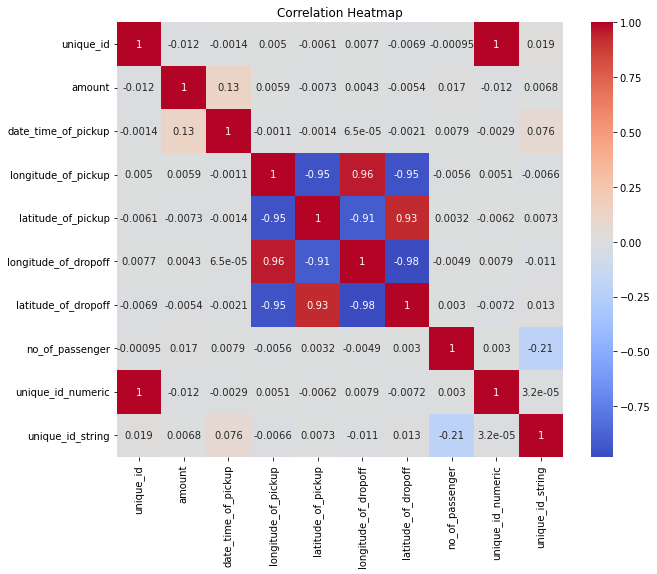

In [26]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(taxi_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [27]:
feature_importances = rf_reg.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

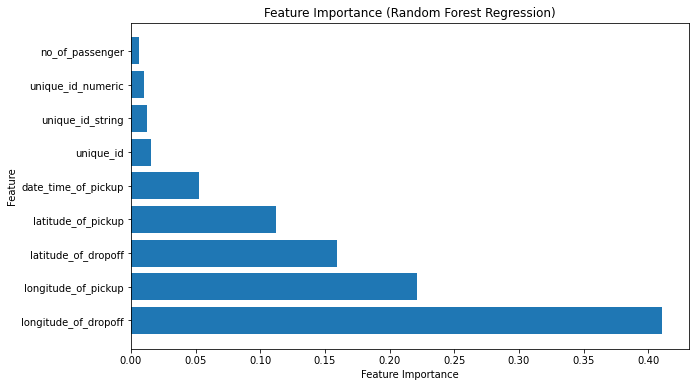

In [28]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), X.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest Regression)')
plt.show()